In [1]:
import pandas as pd
from sklearn.metrics import pairwise_distances, pairwise
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from IPython.core.display import HTML

In [2]:
for _ in [ '../src' ]:
  if not _ in sys.path:
    sys.path.append(_)

In [3]:
from harmonic_distance import key_aware_pairwise_distances, harmonic_scale

In [4]:
from importlib import reload
reload(sys.modules['harmonic_distance'])
from harmonic_distance import key_aware_pairwise_distances, harmonic_scale

In [5]:
spotify_df = (
  pd.read_csv('../data/6.3.2_spotify_10_songs.csv')
  .rename(columns=lambda x: x.strip())
  .assign(id=lambda x: x.id.str.strip())
  .assign(
    song_initials = lambda x: x.apply(lambda r: ''.join([ word[0] for word in r.song_name.strip().split(' ')[0:5] ]), axis=1)
  )
  .set_index('song_initials')
)
spotify_df

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
song_initials,,,,,,,,,,,,,,,,,
MB,My Band ...,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
TRSS,The Real Slim Shady ...,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
ÁDM,Águas De Março ...,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
TGFI,The Girl From Ipanema ...,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
PIB,"Paint It, Black ...",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
SOS,Sultans Of Swing ...,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
SR-Cd,Space Raiders - Charlotte de Witte Remix ...,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
IS,In Silence ...,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
WO4N4,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...


In [6]:
spotify_df.sort_values('danceability')

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
song_initials,,,,,,,,,,,,,,,,,
WO4N4,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...
Nembm,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4,7n92QzQomRCLlciO14X0kd,https://open.spotify.com/track/7n92QzQomRCLlci...
PIB,"Paint It, Black ...",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
TGFI,The Girl From Ipanema ...,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
ÁDM,Águas De Março ...,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
SOS,Sultans Of Swing ...,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
IS,In Silence ...,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
SR-Cd,Space Raiders - Charlotte de Witte Remix ...,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
MB,My Band ...,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...


### 4.1.&nbsp; Explore the 10 songs dataset

Import the 10 songs dataset into a new notebook and explore it like we did at the beginning of this notebook. Do you agree with the liveliness scores that certain songs have been given? Do you think the top 3 most danceable songs are the most danceable songs in the list? Ask questions of the data and see where it leads you.

If you're not familiar with any of the songs, look them up on YouTube or Spotify and listen to at least 30 seconds of each song to get a feel for them. Even if you're not a music expert we can all tell the difference between gangster rap and classical, right? Look at the scores given and see if they make sense with **how these songs make you feel**.

### 4.2.&nbsp; Calculate distances between the 10 songs using the audio features

Calculate the distances between the 10 songs using their audio features. Do the distances make sense? Do songs that sound similar have a shorter distance between them? Look back at the original dataframe and see if you can spot any patterns in the distances between songs.

In [7]:
distances_df = pd.DataFrame(
  pairwise_distances(
    spotify_df
    .drop(columns=['song_name', 'artist', 'id', 'html', 'duration_ms', 'tempo'])
  ),
  index=spotify_df.index,
  columns=spotify_df.index)
distances_df

song_initials,MB,TRSS,ÁDM,TGFI,PIB,SOS,SR-Cd,IS,WO4N4,Nembm
song_initials,,,,,,,,,,
MB,0.000000,4.125151,12.347212,15.186879,6.009042,7.832862,8.222887,8.776785,30.255001,21.491093
TRSS,4.125151,0.000000,11.520609,12.985027,6.529339,5.880004,6.865284,8.867451,29.405436,20.646929
ÁDM,12.347212,11.520609,0.000000,5.168844,6.624061,5.927178,4.933437,4.247965,18.049341,9.259518
TGFI,15.186879,12.985027,5.168844,0.000000,10.337505,7.498282,7.285201,8.595042,17.491431,9.410430
PIB,6.009042,6.529339,6.624061,10.337505,0.000000,4.093357,3.574441,2.950537,24.383720,15.645328
SOS,7.832862,5.880004,5.927178,7.498282,4.093357,0.000000,1.794131,4.616718,23.642594,14.914877
SR-Cd,8.222887,6.865284,4.933437,7.285201,3.574441,1.794131,0.000000,3.219545,22.724259,13.926042
IS,8.776785,8.867451,4.247965,8.595042,2.950537,4.616718,3.219545,0.000000,21.649796,12.905617
WO4N4,30.255001,29.405436,18.049341,17.491431,24.383720,23.642594,22.724259,21.649796,0.000000,8.870794


In [8]:
key_aware_distances_df_without_mode = pd.DataFrame(
  key_aware_pairwise_distances(
    spotify_df
    #[['key']]
    .rename(columns={'mode': '_mode'})
    .drop(columns=['song_name', 'artist', 'id', 'html', 'duration_ms', 'tempo'])
  ),
  index=spotify_df.index,
  columns=spotify_df.index)
key_aware_distances_df_without_mode

song_initials,MB,TRSS,ÁDM,TGFI,PIB,SOS,SR-Cd,IS,WO4N4,Nembm
song_initials,,,,,,,,,,
MB,0.000000,1.208847,12.188714,13.478467,6.009042,6.767434,7.672409,8.776785,30.190664,21.400425
TRSS,1.208847,0.000000,11.350574,12.643612,5.203529,5.880004,6.842994,7.942049,29.339236,20.552537
ÁDM,12.188714,11.350574,0.000000,1.320882,6.323709,5.589504,4.902372,3.762488,18.049341,9.259518
TGFI,13.478467,12.643612,1.320882,0.000000,7.608665,6.890155,6.125242,4.990243,16.762397,7.973956
PIB,6.009042,5.203529,6.323709,7.608665,0.000000,1.095453,2.006645,2.950537,24.303845,15.520548
SOS,6.767434,5.880004,5.589504,6.890155,1.095453,0.000000,1.706854,2.399694,23.560207,14.783932
SR-Cd,7.672409,6.842994,4.902372,6.125242,2.006645,1.706854,0.000000,1.271012,22.717535,13.915067
IS,8.776785,7.942049,3.762488,4.990243,2.950537,2.399694,1.271012,0.000000,21.559796,12.754061
WO4N4,30.190664,29.339236,18.049341,16.762397,24.303845,23.560207,22.717535,21.559796,0.000000,8.870794


In [9]:
key_aware_distances_df_with_mode = pd.DataFrame(
  key_aware_pairwise_distances(
    spotify_df
    #[['key']]
    .drop(columns=['song_name', 'artist', 'id', 'html', 'duration_ms', 'tempo'])
  ),
  index=spotify_df.index,
  columns=spotify_df.index)
key_aware_distances_df_with_mode

song_initials,MB,TRSS,ÁDM,TGFI,PIB,SOS,SR-Cd,IS,WO4N4,Nembm
song_initials,,,,,,,,,,
MB,0.000000,1.208847,12.212620,13.493915,6.029809,6.785880,7.656100,8.791016,30.200323,21.414050
TRSS,1.208847,0.000000,11.346903,12.633722,5.163337,5.901224,6.824703,7.915774,29.337816,20.550510
ÁDM,12.212620,11.346903,0.000000,1.320882,6.323709,5.589504,4.902372,3.762488,18.049341,9.259518
TGFI,13.493915,12.633722,1.320882,0.000000,7.608665,6.890155,6.125242,4.990243,16.762397,7.973956
PIB,6.029809,5.163337,6.323709,7.608665,0.000000,1.095453,2.006645,2.950537,24.303845,15.520548
SOS,6.785880,5.901224,5.589504,6.890155,1.095453,0.000000,1.706854,2.399694,23.560207,14.783932
SR-Cd,7.656100,6.824703,4.902372,6.125242,2.006645,1.706854,0.000000,1.271012,22.717535,13.915067
IS,8.791016,7.915774,3.762488,4.990243,2.950537,2.399694,1.271012,0.000000,21.559796,12.754061
WO4N4,30.200323,29.337816,18.049341,16.762397,24.303845,23.560207,22.717535,21.559796,0.000000,8.870794


### 4.3.&nbsp; Create a heatmap to visualise the distances

Create a heatmap to visualise the distances between the 10 songs. This will help you to see the extremes and identify patterns more easily. Once you have created the heatmap, listen to the songs again and see if you agree with the songs that are most similar and most dissimilar.

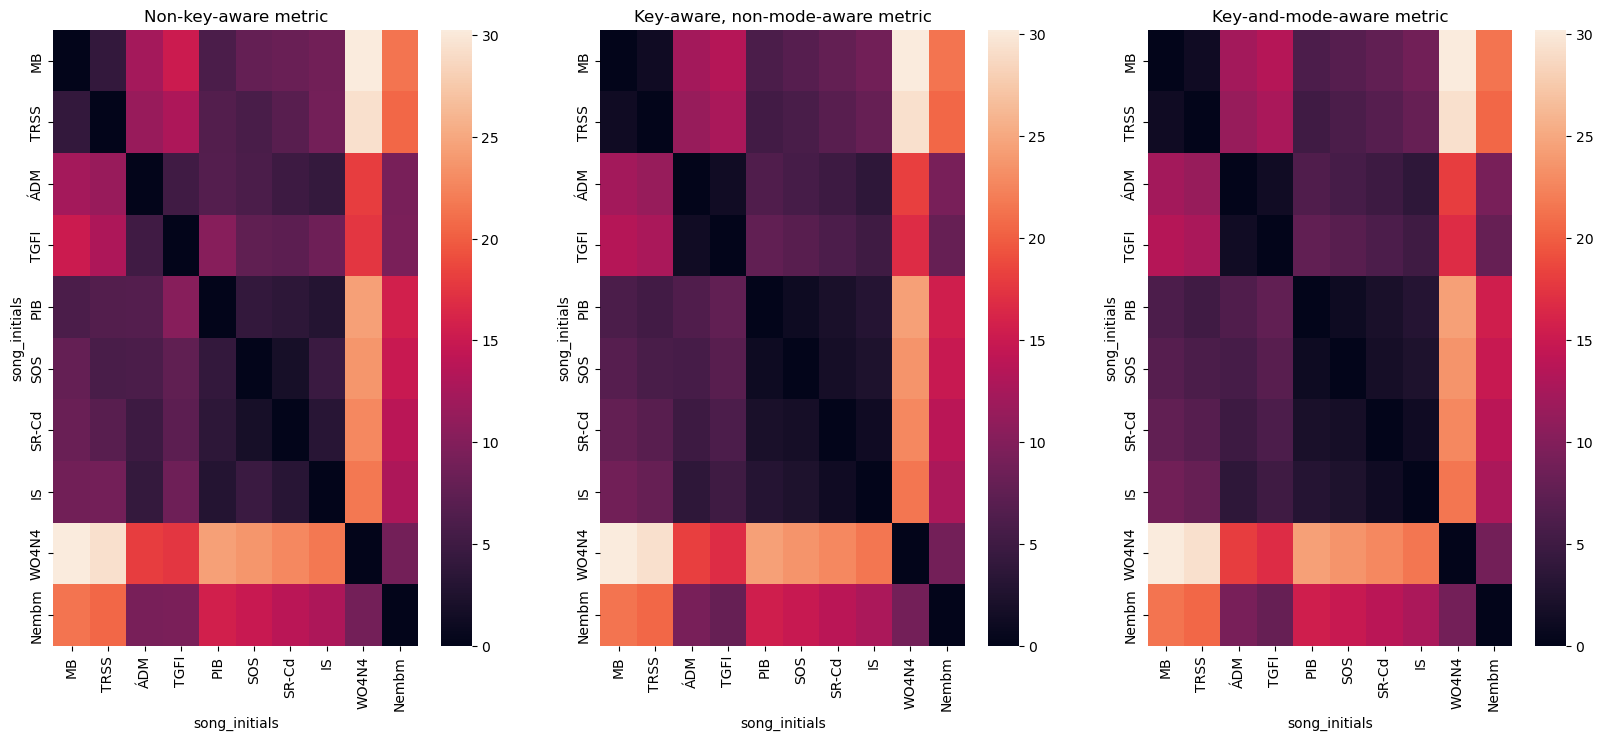

In [10]:
# Create a figure with a size of 12 inches by 8 inches
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(distances_df, ax=ax1);
sns.heatmap(key_aware_distances_df_without_mode, ax=ax2);
sns.heatmap(key_aware_distances_df_with_mode, ax=ax3);

ax1.set_title('Non-key-aware metric');
ax2.set_title('Key-aware, non-mode-aware metric');
ax3.set_title('Key-and-mode-aware metric');

### 4.4.&nbsp; Familiarise yourself with the documentation for scikit-learn

We'll be using scikit-learn a lot in the coming weeks, so it's a good idea to start familiarising yourself with its documentation now. The documentation is very well written, so be sure to check it out, start with the [pairwise_distances](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html) function that we used in this notebook. Play around with and read up on some of the parameters that we didn't use.

## 6.&nbsp; Challenge: apply this to the spotify dataset 😃
In a new notebook, try out the different scalers and transformers on the Spotify data and compare the results. You can compare the results by looking at the numbers, perhaps comparing a single column as we did above. You should also look at the differences using heatmaps, side-by-side, to see if any of the scalers have had a noticeable effect.

>With the carefully chosen 10 songs, you might not see a massive effect. But soon we'll start working with a Spotify dataset of 5000 songs, where scaling will have a much larger impact.

In [11]:
categoricals = ['key', 'mode', 'time_signature']

In [12]:
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, RobustScaler, StandardScaler

In [13]:
scaler = MinMaxScaler().set_output(transform='pandas')
scaled_df = (
  scaler.fit_transform(
    spotify_df.drop(columns=['song_name', 'artist', 'id', 'html', 'duration_ms', *categoricals])
  )
  .join(spotify_df[categoricals])
)
scaled_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature
song_initials,,,,,,,,,,,,
MB,0.871895,1.000000,1.000000,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,1,0,4
TRSS,1.000000,0.776369,0.971414,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,5,0,4
ÁDM,0.598693,0.393341,0.597610,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,3,1,4
TGFI,0.597386,0.156625,0.554880,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,8,1,4
PIB,0.366013,0.935766,0.804648,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,1,1,4
SOS,0.717647,0.934576,0.779548,0.000000,0.059036,0.040197,0.804864,1.000000,0.891797,5,1,4
SR-Cd,0.738562,0.859636,0.751594,0.707228,0.000000,0.949617,0.185520,0.000000,0.725362,4,1,4
IS,0.721569,0.995242,0.713347,0.064044,0.002371,0.986857,0.185520,0.158632,0.684332,1,1,4
WO4N4,0.000000,0.000000,0.000000,0.193962,0.998987,0.652793,0.165724,0.173554,0.000484,3,1,3


In [14]:
rescaled_distances_df = pd.DataFrame(
  key_aware_pairwise_distances(scaled_df),
  index=spotify_df.index,
  columns=spotify_df.index)
display(rescaled_distances_df)

song_initials,MB,TRSS,ÁDM,TGFI,PIB,SOS,SR-Cd,IS,WO4N4,Nembm
song_initials,,,,,,,,,,
MB,0.000000,0.930005,1.710819,1.736222,1.622301,1.629405,1.769235,1.817635,2.664629,2.461144
TRSS,0.930005,0.000000,1.740696,1.655998,1.711104,1.530085,1.856604,1.653840,2.562530,2.324704
ÁDM,1.710819,1.740696,0.000000,0.987284,1.445892,1.661425,1.716123,1.797111,1.943643,1.785264
TGFI,1.736222,1.655998,0.987284,0.000000,1.589509,1.557170,1.789796,1.597553,1.642433,1.360837
PIB,1.622301,1.711104,1.445892,1.589509,0.000000,1.036760,1.567387,1.532978,2.478533,2.321961
SOS,1.629405,1.530085,1.661425,1.557170,1.036760,0.000000,1.855604,1.578141,2.507910,2.303443
SR-Cd,1.769235,1.856604,1.716123,1.789796,1.567387,1.855604,0.000000,0.843840,2.334367,1.937257
IS,1.817635,1.653840,1.797111,1.597553,1.532978,1.578141,0.843840,0.000000,2.172815,1.699116
WO4N4,2.664629,2.562530,1.943643,1.642433,2.478533,2.507910,2.334367,2.172815,0.000000,1.150994


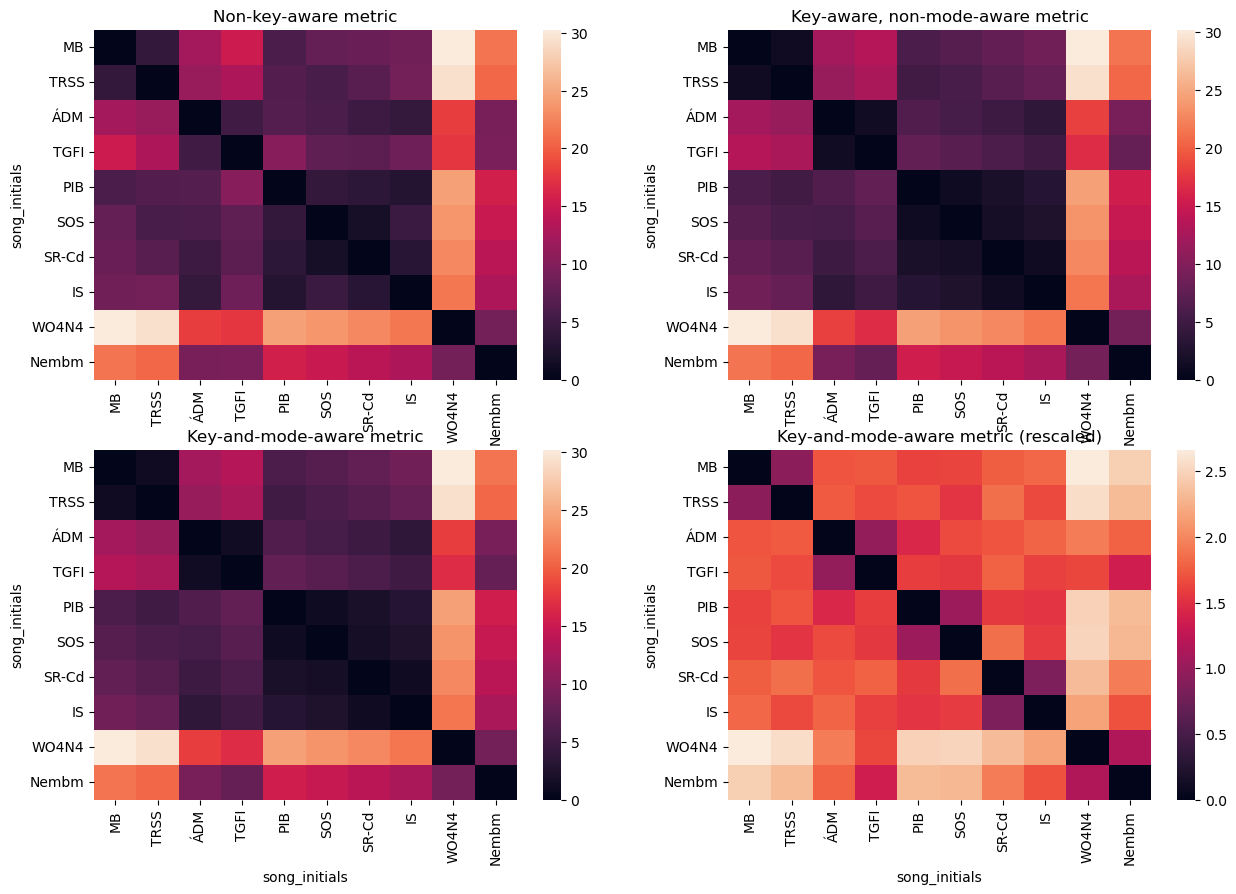

In [15]:
# Create a figure with a size of 12 inches by 8 inches
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(distances_df, ax=ax[0,0]);
sns.heatmap(key_aware_distances_df_without_mode, ax=ax[0,1]);
sns.heatmap(key_aware_distances_df_with_mode, ax=ax[1,0]);
sns.heatmap(rescaled_distances_df, ax=ax[1,1]);

ax[0,0].set_title('Non-key-aware metric');
ax[0,1].set_title('Key-aware, non-mode-aware metric');
ax[1,0].set_title('Key-and-mode-aware metric');
ax[1,1].set_title('Key-and-mode-aware metric (rescaled)');

In [16]:
harmonic_scaled_df = harmonic_scale(scaled_df)
harmonic_scaled_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode,time_signature,harmonic
song_initials,,,,,,,,,,,,
MB,0.871895,1.000000,1.000000,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0,4,0.666667
MB,0.871895,1.000000,1.000000,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0,4,2.666667
TRSS,1.000000,0.776369,0.971414,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0,4,-0.666667
TRSS,1.000000,0.776369,0.971414,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0,4,1.333333
ÁDM,0.598693,0.393341,0.597610,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,1,4,-0.500000
ÁDM,0.598693,0.393341,0.597610,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,1,4,1.500000
TGFI,0.597386,0.156625,0.554880,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,1,4,-0.666667
TGFI,0.597386,0.156625,0.554880,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,1,4,1.333333
PIB,0.366013,0.935766,0.804648,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,1,4,-0.833333


In [17]:
harmonic_scale_rescaled_distances_df = (
  pd.DataFrame(
    pairwise_distances(harmonic_scaled_df),
    index=harmonic_scaled_df.index,
    columns=harmonic_scaled_df.index)
  .groupby(lambda x:x)
  .min()
  .loc[spotify_df.index]
  .T
  .groupby(lambda x:x)
  .min()
  .loc[spotify_df.index]
)
display(harmonic_scale_rescaled_distances_df)

song_initials,MB,TRSS,ÁDM,TGFI,PIB,SOS,SR-Cd,IS,WO4N4,Nembm
song_initials,,,,,,,,,,
MB,0.000000,0.930005,1.710819,1.736222,1.622301,1.629405,1.769235,1.817635,2.664629,2.461144
TRSS,0.930005,0.000000,1.740696,1.655998,1.711104,1.530085,1.856604,1.653840,2.562530,2.324704
ÁDM,1.710819,1.740696,0.000000,0.987284,1.445892,1.661425,1.716123,1.797111,1.943643,1.785264
TGFI,1.736222,1.655998,0.987284,0.000000,1.589509,1.557170,1.789796,1.597553,1.642433,1.360837
PIB,1.622301,1.711104,1.445892,1.589509,0.000000,1.036760,1.567387,1.532978,2.478533,2.321961
SOS,1.629405,1.530085,1.661425,1.557170,1.036760,0.000000,1.855604,1.578141,2.507910,2.303443
SR-Cd,1.769235,1.856604,1.716123,1.789796,1.567387,1.855604,0.000000,0.843840,2.334367,1.937257
IS,1.817635,1.653840,1.797111,1.597553,1.532978,1.578141,0.843840,0.000000,2.172815,1.699116
WO4N4,2.664629,2.562530,1.943643,1.642433,2.478533,2.507910,2.334367,2.172815,0.000000,1.150994


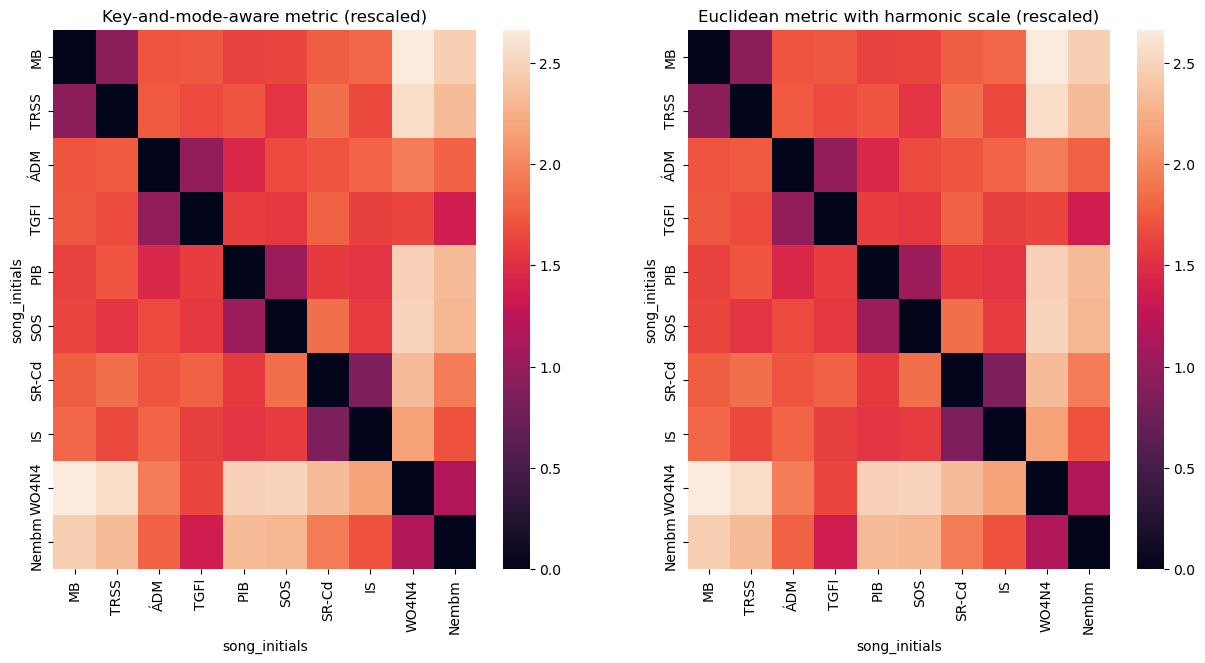

In [18]:
# Create a figure with a size of 12 inches by 8 inches
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(rescaled_distances_df, ax=ax[0]);
sns.heatmap(harmonic_scale_rescaled_distances_df, ax=ax[1]);

ax[0].set_title('Key-and-mode-aware metric (rescaled)');
ax[1].set_title('Euclidean metric with harmonic scale (rescaled)');

## k-means

In [19]:
kmeans_df = harmonic_scaled_df
kmeans_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode,time_signature,harmonic
song_initials,,,,,,,,,,,,
MB,0.871895,1.000000,1.000000,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0,4,0.666667
MB,0.871895,1.000000,1.000000,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0,4,2.666667
TRSS,1.000000,0.776369,0.971414,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0,4,-0.666667
TRSS,1.000000,0.776369,0.971414,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0,4,1.333333
ÁDM,0.598693,0.393341,0.597610,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,1,4,-0.500000
ÁDM,0.598693,0.393341,0.597610,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,1,4,1.500000
TGFI,0.597386,0.156625,0.554880,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,1,4,-0.666667
TGFI,0.597386,0.156625,0.554880,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,1,4,1.333333
PIB,0.366013,0.935766,0.804648,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,1,4,-0.833333


In [20]:
inertia = {}
silhouette_scores = {}
kmeans = {}

In [21]:
for k in range(2, len(kmeans_df.index.unique())+1):
  km = KMeans(n_clusters=k, n_init='auto')
  km.fit(kmeans_df);
  inertia[k] = km.inertia_
  silhouette_scores[k] = silhouette_score(harmonic_scaled_df, km.labels_)
  kmeans[k] = km
inertia, silhouette_scores

({2: 33.245309704999414,
  3: 28.79025644969853,
  4: 22.945456509124284,
  5: 20.898379330651714,
  6: 17.531263497062458,
  7: 14.27707827382645,
  8: 12.566523505001488,
  9: 9.780682885572894,
  10: 7.649901227345084},
 {2: 0.2682453233721213,
  3: 0.18087863770322649,
  4: 0.21400835948105904,
  5: 0.1443118825502553,
  6: 0.18060913053237435,
  7: 0.1654647675629072,
  8: 0.18100938424556376,
  9: 0.22832093653728974,
  10: 0.2682469395328487})

In [22]:
k_df = MinMaxScaler().set_output(transform='pandas').fit_transform(
  pd.DataFrame(
    list(sorted(inertia.items())),
    columns=['k','inertia'])
  .set_index('k')
  .join(
    pd.DataFrame(
        list(sorted(silhouette_scores.items())),
        columns=['k','silhouette'])
    .set_index('k')
    )
)
k_df

,inertia,silhouette
k,,
2,1.000000,0.999987
3,0.825943,0.295048
4,0.597590,0.562363
5,0.517612,0.000000
6,0.386060,0.292873
7,0.258921,0.170677
8,0.192090,0.296103
9,0.083249,0.677847
10,0.000000,1.000000


/home/til/local/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/til/local/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


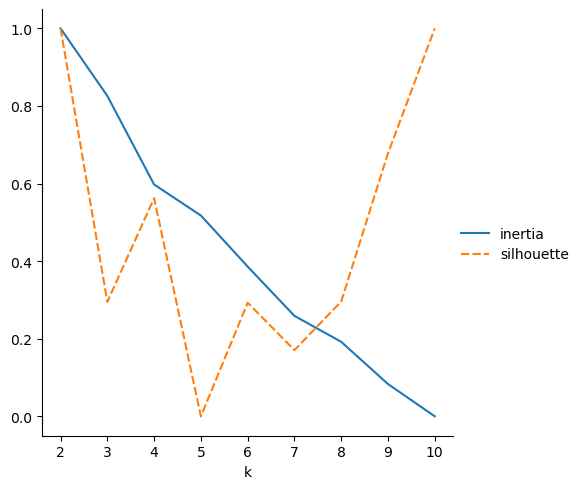

In [23]:
sns.relplot(k_df, kind='line');

In [26]:
def make_spotify_link(url):
    return f'<a href="{url}">Play</a>'

def embed_spotify(trackid):
  return f'<iframe style="border-radius:12px; min-width:250px;" src="https://open.spotify.com/embed/track/{trackid.strip()}?utm_source=generator" width="100%" height="152" frameBorder="0" allowfullscreen="" allow="autoplay; clipboard-write; encrypted-media; fullscreen; picture-in-picture" loading="lazy"></iframe>'


In [28]:
k=4
(
  harmonic_scaled_df.assign(label=kmeans[k].labels_, distance=[
    kmeans[k].transform(kmeans_df.iloc[[i]])[0,kmeans[k].labels_[i]]
    for i in range(len(harmonic_scaled_df))
  ])
  .sort_values(['song_initials','distance'])
  .groupby(lambda x:x) # group by index
  .first() # pick closest of each duplicated song (circle of fifths distance)
  .sort_values(['label','distance'])
  .join(spotify_df.id)
  .pipe(lambda x: x.style.format({'id': embed_spotify}))
)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode,time_signature,harmonic,label,distance,id
song_initials,,,,,,,,,,,,,,,
TGFI,0.597386,0.156625,0.554880,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,1,4,1.333333,0,0.719500,
Nembm,0.265359,0.043739,0.292331,0.052150,1.000000,1.000000,0.188348,0.012856,0.000000,1,4,1.500000,0,0.852988,
WO4N4,0.000000,0.000000,0.000000,0.193962,0.998987,0.652793,0.165724,0.173554,0.000484,1,3,1.500000,0,1.042431,
ÁDM,0.598693,0.393341,0.597610,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,1,4,-0.500000,1,0.973097,
IS,0.721569,0.995242,0.713347,0.064044,0.002371,0.986857,0.185520,0.158632,0.684332,1,4,1.166667,2,0.632903,
SR-Cd,0.738562,0.859636,0.751594,0.707228,0.000000,0.949617,0.185520,0.000000,0.725362,1,4,0.666667,2,0.865575,
PIB,0.366013,0.935766,0.804648,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,1,4,1.166667,2,1.128221,
TRSS,1.000000,0.776369,0.971414,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0,4,1.333333,3,0.624317,
MB,0.871895,1.000000,1.000000,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0,4,0.666667,3,1.041791,
